**Tesseract 4 includes a new “neural network-based recognition engine that delivers significantly higher accuracy (on document images) than the previous versions, in return for a significant increase in required compute power. On complex languages however, it may actually be faster than base Tesseract**



**Page segmentation modes:**

0. Orientation and script detection (OSD) only.

1. Automatic page segmentation with OSD.

2. Automatic page segmentation, but no OSD, or OCR. (not implemented)

3. Fully automatic page segmentation, but no OSD. (Default)

4. Assume a single column of text of variable sizes.

5. Assume a single uniform block of vertically aligned text.

6. Assume a single uniform block of text.

7. Treat the image as a single text line.

8. Treat the image as a single word.

9. Treat the image as a single word in a circle.

10. Treat the image as a single character.

11. Sparse text. Find as much text as possible in no particular order.

12. Sparse text with OSD.

13. Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.**

**OCR Engine modes:**

1. Legacy engine only.
2. Neural nets LSTM engine only.
3. Legacy + LSTM engines.
4. Default, based on what is available.

In [1]:
!lsb_release -a #print ubuntu version on colab


No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic


In [2]:
! apt-get install tesseract-ocr # install tessaract engine on  Ubuntu 18.x bionic
! apt-get instal libtesseract-dev
!pip install pytesseract  
!sudo apt-get install tesseract-ocr-ara  # install arabic language #
#install additional libraries:
!sudo apt-get install libicu-dev


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,992 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../tesserac

In [3]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
from skimage.io import imread_collection

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#imges folder  form my google drive
imgs_dir = '/content/drive/MyDrive/Data50/*.png'
#creating a collection with the available images
imgs = imread_collection(imgs_dir)

In [6]:
len(imgs)

10

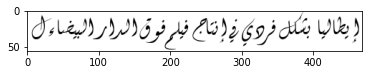

In [7]:
plt.imshow(imgs[4])

In [54]:
text = pytesseract.image_to_string(imgs[4],lang='ara',config='--psm 7 --oem 3')
print(text)

(يثاليا مكل فروي ف نَل فر فرق (لرا م(اليضاءكل



In [9]:
!git clone https://github.com/kevinbicycle/ocrd-train.git  #clone ocrd-train 

Cloning into 'ocrd-train'...
remote: Enumerating objects: 141, done.
remote: Total 141 (delta 0), reused 0 (delta 0), pack-reused 141
Receiving objects: 100% (141/141), 5.21 MiB | 24.34 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [10]:
!git clone https://github.com/DanBloomberg/leptonica

Cloning into 'leptonica'...
remote: Enumerating objects: 14075, done.
remote: Counting objects: 100% (464/464), done.
remote: Compressing objects: 100% (360/360), done.
remote: Total 14075 (delta 267), reused 217 (delta 104), pack-reused 13611
Receiving objects: 100% (14075/14075), 23.78 MiB | 22.32 MiB/s, done.
Resolving deltas: 100% (11365/11365), done.


In [11]:
!git clone https://github.com/tesseract-ocr/tessdata_best

Cloning into 'tessdata_best'...
remote: Enumerating objects: 254, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 254 (delta 0), reused 2 (delta 0), pack-reused 250
Receiving objects: 100% (254/254), 1.30 GiB | 27.83 MiB/s, done.
Resolving deltas: 100% (41/41), done.
Checking out files: 100% (167/167), done.


In [12]:
!sudo cp /content/drive/MyDrive/Data50_updated/*  /content/ocrd/data/ground-truth/

In [13]:
#copy leptonica file from my drive into main folder env

#!sudo cp -R /content/drive/MyDrive/tessdata_best-master/leptonica-1.79.0  /content/

In [13]:
cd /content/ocrd

/content/ocrd


In [14]:
!sudo make leptonica tesseract langdata

wget 'http://www.leptonica.org/source/leptonica-1.75.3.tar.gz'
--2021-07-30 00:16:43--  http://www.leptonica.org/source/leptonica-1.75.3.tar.gz
Resolving www.leptonica.org (www.leptonica.org)... 208.67.207.65
Connecting to www.leptonica.org (www.leptonica.org)|208.67.207.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12379109 (12M) [application/x-gzip]
Saving to: ‘leptonica-1.75.3.tar.gz’

leptonica-1.75.3.ta 100%[===================>]  11.80M  11.4MB/s    in 1.0s    

2021-07-30 00:16:44 (11.4 MB/s) - ‘leptonica-1.75.3.tar.gz’ saved [12379109/12379109]

tar xf "leptonica-1.75.3.tar.gz"
cd leptonica-1.75.3 ; \
	./configure --prefix=/usr && \
	make -j4 && \
	make install && \
	date > "leptonica.built"
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file

In [15]:
!tesseract

Usage:
  tesseract --help | --help-extra | --version
  tesseract --list-langs
  tesseract imagename outputbase [options...] [configfile...]

OCR options:
  -l LANG[+LANG]        Specify language(s) used for OCR.
NOTE: These options must occur before any configfile.

Single options:
  --help                Show this help message.
  --help-extra          Show extra help for advanced users.
  --version             Show version information.
  --list-langs          List available languages for tesseract engine.


In [16]:
!tesseract --list-langs

List of available languages (3):
osd
ara
eng


In [17]:
!tesseract --version

tesseract 4.0.0-beta.1
 leptonica-1.75.3
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0

 Found AVX2
 Found AVX
 Found SSE


In [18]:
cd /content/ocrd

/content/ocrd


In [20]:
# #copy  tessdata file form my drive to colab env
#!sudo cp /content/drive/MyDrive/tessdata_best-master/*  /usr/share/tesseract-ocr/4.00/tessdata/

In [22]:
!sudo apt-get install bc


Reading package lists... Done
Building dependency tree       
Reading state information... Done
bc is already the newest version (1.07.1-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [24]:
!make training MODEL_NAME=MyArabicModel START_MODEL=ara TESSDATA=/content/tessdata_best/


mkdir -p data/ara
combine_tessdata -u /content/tessdata_best//ara.traineddata  data/ara/ara
Extracting tessdata components from /content/tessdata_best//ara.traineddata
Wrote data/ara/ara.config
Wrote data/ara/ara.lstm
Wrote data/ara/ara.lstm-punc-dawg
Wrote data/ara/ara.lstm-word-dawg
Wrote data/ara/ara.lstm-number-dawg
Wrote data/ara/ara.lstm-unicharset
Wrote data/ara/ara.lstm-recoder
Wrote data/ara/ara.version
Version string:4.00.00alpha:ara:synth20170629:[1,48,0,1Ct3,3,16Mp3,3Lfys64Lfx96Lrx96Lfx512O1c1]
0:config:size=545, offset=192
17:lstm:size=11582395, offset=737
18:lstm-punc-dawg:size=1986, offset=11583132
19:lstm-word-dawg:size=999442, offset=11585118
20:lstm-number-dawg:size=13250, offset=12584560
21:lstm-unicharset:size=5061, offset=12597810
22:lstm-recoder:size=769, offset=12602871
23:version:size=80, offset=12603640
unicharset_extractor --output_unicharset "data/ground-truth/my.unicharset" --norm_mode 2 "data/all-boxes"
Extracting unicharset from box file data/all-boxes
Wro

In [28]:
#copy our extacted model to tessdata file
!sudo cp /content/ocrd/data/MyArabicModel.traineddata  /usr/share/tesseract-ocr/4.00/tessdata/MyArabicModel_2.traineddata

In [29]:
!tesseract --list-langs  #we have to see new model here "MyArabicModel" trained model name

List of available languages (5):
MyArabicModel_2
osd
ara
eng
MyArabicModel_1


In [34]:
#copy images and labels form our drive into ground-truth folder in OCRD
!sudo cp /content/drive/MyDrive/Data50/*  /content/ocrd/data/test

**Read the text form image by our trained Model**




In [63]:
!tesseract /content/ocrd/data/test/Diwani_Letter_95502.png stdout  -l MyArabicModel_2 --psm=7 --oem=3  #test images form validation list
 ##Diwani_Letter_95502

Failed to load any lstm-specific dictionaries for lang MyArabicModel_2!!
Warning. Invalid resolution 0 dpi. Using 70 instead.
Estimating resolution as 322
طلميل18ساع راااا اقامنةا ة_واةاةاة قارلاااااكالال انها مج427-بىًّ-ْ-ع


**#we note here the result not good as the orignial arabic tessacract Model and that may our data too small just 10 labeled images**





**plot the text image which we tested**


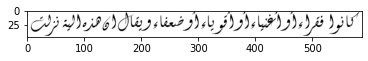

In [41]:
img = cv2.imread('/content/ocrd/data/test/Diwani_Letter_95502.png',0) # reads image 'opencv-logo.png' as grayscale
plt.imshow(img, cmap='gray')

**Read the text form image by original arabic model in tessaract**


In [56]:
text = pytesseract.image_to_string(img,lang='ara',config='--psm 7 --oem 3')
print(text)

كانوا فقا ءاثر (لغنياء اث اقوياء اث رضعفاء يفال (ى قزء اليد زلى



**Lets check the size of our trained model**

In [43]:
import os


def convert_bytes(num):
    """
    this function will convert bytes to MB.... GB... etc
    """
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if num < 1024.0:
            return "%3.1f %s" % (num, x)
        num /= 1024.0


def file_size(file_path):
    """
    this function will return the file size
    """
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        return convert_bytes(file_info.st_size)

In [44]:
# or you can use any file path
file_path = r"/usr/share/tesseract-ocr/4.00/tessdata/MyArabicModel_2.traineddata"
print (file_size(file_path))

11.0 MB


In [45]:
# original arabic model 
file_path = r"/usr/share/tesseract-ocr/4.00/tessdata/ara.traineddata"
print (file_size(file_path))

1.4 MB


In [48]:
#download our trined model and all ocrd file
from google.colab import files
files.download('/content/ocrd')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>